In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/DataScience'

/content/drive/MyDrive/DataScience


In [3]:
!pip install -Uqq fastai

In [4]:
!pip install -Uqq duckduckgo_search

     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 96 kB 6.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [5]:
!pip install fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 719 kB 35.3 MB/s 
     |████████████████████████████████| 431 kB 65.4 MB/s 
     |████████████████████████████████| 4.9 MB 60.0 MB/s 
     |████████████████████████████████| 1.3 MB 57.3 MB/s 
     |████████████████████████████████| 120 kB 68.6 MB/s 
     |████████████████████████████████| 115 kB 68.4 MB/s 
     |████████████████████████████████| 212 kB 67.8 MB/s 
     |████████████████████████████████| 140 kB 69.6 MB/s 
     |████████████████████████████████| 6.6 MB 57.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [6]:
import os
from fastbook import *
from tqdm import tqdm
import warnings
import numpy
warnings.filterwarnings('ignore')

In [7]:
searches = ['Narendra Modi','vladimir putin']

In [8]:
path = Path('Politicians Classifier') ## Creating a path for the Folder

if not path.exists():         ## If the folder is not available 
    os.mkdir(path)            ## We create a new folder
    for politician in tqdm(searches):    ## Iterate each celebrity from the search list
        dest = (path/politician)   ## create a path where we should store the photos
        os.mkdir(dest)        ## Create the folders
        results = search_images_ddg(f'{politician} photo')         ## Search Images for each celeb (stores just URL)
        download_images(dest,urls = results[:300])              ## Download Images
        resize_images(dest, max_size=400, dest=dest)          ## Resize Image

100%|██████████| 2/2 [01:07<00:00, 33.91s/it]


In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);

In [10]:
len(failed)

26

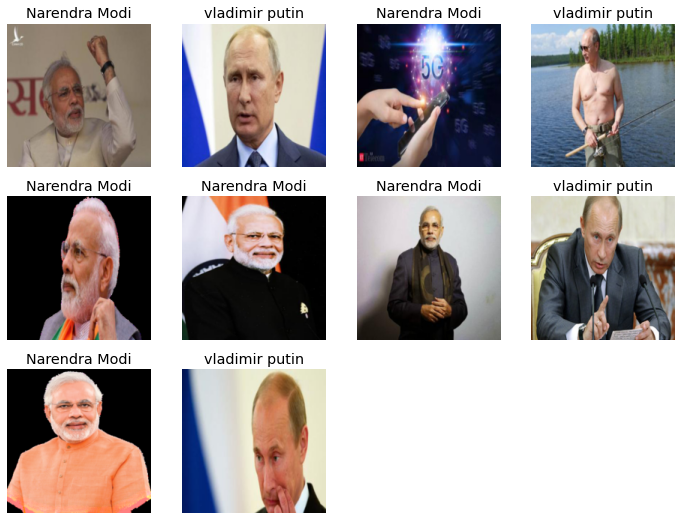

In [11]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=10)

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.227408,0.520427,0.169014,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.329634,0.431018,0.112676,00:02
1,0.267309,0.373753,0.112676,00:02
2,0.181789,0.330573,0.098592,00:02
3,0.137414,0.298840,0.084507,00:02
4,0.107493,0.291883,0.070423,00:02
5,0.089762,0.283737,0.070423,00:02
6,0.075960,0.282890,0.070423,00:02
7,0.063717,0.280885,0.084507,00:02
8,0.054329,0.278597,0.084507,00:02
9,0.048965,0.279838,0.084507,00:02


In [13]:
urls = search_images_ddg('Narendra Modi.jpg',max_images=1)
len(urls),urls[0]

(1,
 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/The_Prime_Minister%2C_Shri_Narendra_Modi_addressing_at_the_Community_Reception_Programme%2C_in_Tel_Aviv%2C_Israel_on_July_05%2C_2017_(4).jpg/1280px-The_Prime_Minister%2C_Shri_Narendra_Modi_addressing_at_the_Community_Reception_Programme%2C_in_Tel_Aviv%2C_Israel_on_July_05%2C_2017_(4).jpg')

In [14]:
dest = Path('Narendra Modi.jpg')
if not dest.exists(): download_url(urls[0],dest,show_progress=False)

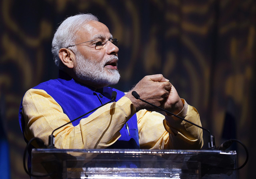

In [15]:
im = Image.open(dest)
im.to_thumb(256,256)

In [33]:
politician,_,probs = learn.predict(PILImage.create('Narendra Modi.jpg'))
print(f"This is : {politician}.")
print(f"Probability of Narendra Modi: {probs[0]:.4f}")
print(f"Probability of Putin: {probs[1]:.4f}")

This is : Narendra Modi.
Probability of Narendra Modi: 0.9619
Probability of Putin: 0.0381


In [25]:
urls = search_images_ddg('Vladimir Putin.jpg',max_images=1)
len(urls),urls[0]

(1,
 'https://www.wallpaperup.com/uploads/wallpapers/2018/03/02/1212155/2e10d772bd402a414c2b50387c1de5ef-700.jpg')

In [26]:
dest = Path('Vladimir Putin.jpg')
if not dest.exists(): download_url(urls[0],dest,show_progress=False)

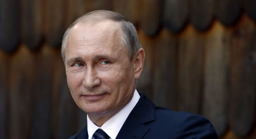

In [27]:
im = Image.open(dest)
im.to_thumb(256,256)

In [34]:
politician,_,probs = learn.predict(PILImage.create('Vladimir Putin.jpg'))
print(f"This is : {politician}.")
print(f"Probability of Narendra Modi: {probs[0]:.4f}")
print(f"Probability of Putin: {probs[1]:.4f}")

This is : vladimir putin.
Probability of Narendra Modi: 0.0000
Probability of Putin: 1.0000
